In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as cst 

# %matplotlib widget
%matplotlib inline

# use paper style 

# plt.style.use('paper_2')

colors= ["#264653", "#2a9d8f", "#8ab17d", "#e9c46a", "#f4a261", "#e76f51", "#b43718"]

params = {"ytick.color" : "black",
            "xtick.color" : "black",
            "axes.labelcolor" : "black",
            "axes.edgecolor" : "black", 
            "font.size": 14}
plt.rc('text', usetex=False)
font  = {'size' : 14}
plt.rc('font', **font)

fontsize = 14

In [3]:
def pow_to_mW(pow_dBm):
    return 10**(pow_dBm/10)*1e-3

def W_to_pow(W):
    return 10*np.log10(1e3*W)

def pow_ratio_to_lin(pow_dB):
    return 10**(pow_dB/10)

# SNR method

Assumes $\kappa_i$, $\kappa_e$, $\bar{n}$ are known

In [4]:
print(cst.h)

6.62607015e-34


In [6]:
def pow_to_mW(pow_dBm):
    return 10**(pow_dBm/10)*1e-3

def W_to_pow(W):
    return 10*np.log10(1e3*W)

def pow_ratio_to_lin(pow_dB):
    return 10**(pow_dB/10)

In [19]:
kappa_i = 2*np.pi*0.39e6
kappa_e = 2*np.pi*0.15e6
nbar = 0.60
f0 = 6.808e9
f_meas = f0 # + 0.1e6

bw = 2400

P_out = (kappa_i**2 + 4*(2*np.pi*(f_meas-f0))**2)/ kappa_e * nbar * cst.h * f0/2 # out of sample
P_out_dB = W_to_pow(P_out)
P_in = ((kappa_i + kappa_e)**2 + 4*(2*np.pi*(f_meas-f0))**2)/ kappa_e * nbar * cst.h * f0/2 # into sample
P_in_dB = W_to_pow(P_in)
print('P_out', P_out_dB, 'dBm')
print('P_in', P_in_dB, 'dBm')


N_on = -84.6 # twpa on, noise floor, signal on
N_off = -90.5 # twpa off, noise floor, signal on

S_on = -65.2
S_off = -81.2

print('SNR_sqrd_on_dB', S_on - N_on)
print('SNR_sqrd_off_dB', S_off - N_off)

G_twpa_dB = S_on - S_off
G_twpa_lin = 10**(G_twpa_dB/10)
print('G_twpa', G_twpa_dB, 'dB')

SNR_sqrd_on = pow_ratio_to_lin(S_on - N_on)
SNR_sqrd_off = pow_ratio_to_lin(S_off - N_off)

T_twpa = P_out / SNR_sqrd_on / cst.k / bw
T_hemt = P_out / SNR_sqrd_off / cst.k / bw

print('T_twpa', T_twpa, 'K')
print('T_hemt', T_hemt, 'K')

P_out -140.6438534541583 dBm
P_in -137.8172703982289 dBm
SNR_sqrd_on_dB 19.39999999999999
SNR_sqrd_off_dB 9.299999999999997
G_twpa 16.0 dB
T_twpa 2.98758403635381 K
T_hemt 30.571738082506986 K


In [5]:
np.sqrt(P_out / (3) / cst.k / bw)

9.313405800996394

In [4]:
# T_vec = np.array([120, 160, 233, 317, 413, 430, 490, 522, 581, 605, 632, 775])*1e-3

# P_off = np.array([-98.98, -98.86, -98.72, -98.92, -98.62, -98.63, -98.42, -98.44, -98.26, -98.15, -98.27, -97.90]) # noise power with twpa on
# P_on = np.array([-91.20, -91.58, -90.69, -90.63, -88.45, -87.29, -86.25, -85.63, -84.37, -84.21, -83.90, -83.30]) # noise power with twpa off


# P_off_lin = 10**(P_off/10)*1e-3
# P_on_lin = 10**(P_on/10)*1e-3

# bw = 360



In [5]:
# T_min_fit = 400*1e-3

# popt_off, pcov_off = np.polyfit(T_vec[T_vec > T_min_fit], P_off_lin[T_vec > T_min_fit], 1, cov=True)
# popt_on, pcov_on = np.polyfit(T_vec[T_vec > T_min_fit], P_on_lin[T_vec > T_min_fit], 1, cov=True)

# G_off = popt_off[0]/cst.k/bw
# G_on = popt_on[0]/cst.k/bw

# # error bars 

# perr_off = np.sqrt(np.diag(pcov_off))
# perr_on = np.sqrt(np.diag(pcov_on))

# G_off_err = perr_off[0]/cst.k/bw
# G_on_err = perr_on[0]/cst.k/bw

# # print the results in db 

# G_off_p = G_off + G_off_err
# G_off_m = G_off - G_off_err

# G_on_p = G_on + G_on_err
# G_on_m = G_on - G_on_err

# G_off_err_db = 10*np.log10(G_off_p) - 10*np.log10(G_off_m)
# G_on_err_db = 10*np.log10(G_on_p) - 10*np.log10(G_on_m)

# print(f'G_off = {10*np.log10(G_off)} +/- {G_off_err_db} dB')
# print(f'G_on = {10*np.log10(G_on)} +/- {G_on_err_db} dB')

# # for the noise temperature only take the first 3 points since it is the flat region 

# P_hemt = np.mean(P_off_lin[:3])
# P_hemt_err = np.std(P_off_lin[:3])

# P_twpa = np.mean(P_on_lin[:3])
# P_twpa_err = np.std(P_on_lin[:3])

# # convert the power in linear units 



# T_hemt = P_hemt/G_off/bw/cst.k
# T_twpa = P_twpa/G_on/bw/cst.k

# T_hemt_err = T_hemt*np.sqrt((P_hemt_err/P_hemt)**2 + (G_off_err/G_off)**2)
# T_twpa_err = T_twpa*np.sqrt((P_twpa_err/P_twpa)**2 + (G_on_err/G_on)**2)


# # print the results in K

# print(f'T_hemt = {T_hemt} +/- {T_hemt_err} K')
# print(f'T_twpa = {T_twpa} +/- {T_twpa_err} K')


G_off = 71.41202650857733 +/- 0.8108287566125227 dB
G_on = 92.74565495955028 +/- 0.9180849183133404 dB
T_hemt = 1.8932514157091898 +/- 0.18222120992659888 K
T_twpa = 0.08220892312335529 +/- 0.011097874564600891 K


In [19]:
-41.6-(-126.1+12.7+71.4)

0.39999999999998437

In [6]:
P_hemt/G_off

9.410096425850918e-21

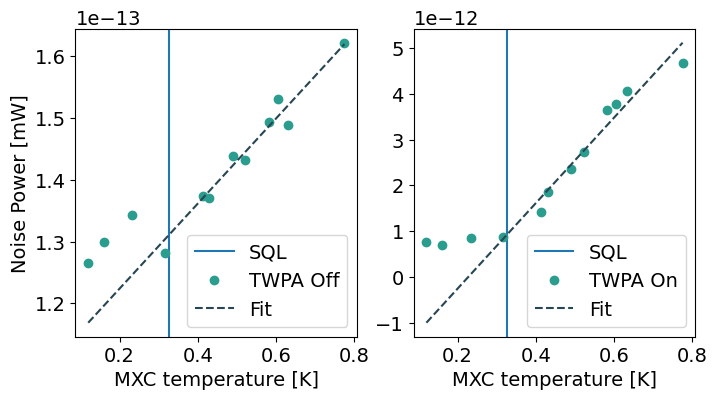

In [23]:
fig, ax = plt.subplots(1,2 , figsize=(8, 4))

plt.sca(ax[0])
plt.axvline(cst.h*(6.808e9)/cst.k, label='SQL')
ax[0].plot(T_vec, P_off_lin, 'o', label='TWPA Off', color = colors[1])
ax[0].plot(T_vec, np.polyval(popt_off, T_vec), '--', color = colors[0], label='Fit')

plt.sca(ax[1])
plt.axvline(cst.h*(6.808e9)/cst.k, label='SQL')
ax[1].plot(T_vec, P_on_lin, 'o', label='TWPA On', color = colors[1])
ax[1].plot(T_vec, np.polyval(popt_on, T_vec), '--', color = colors[0], label='Fit')

plt.sca(ax[0])
plt.legend()
plt.xlabel('MXC temperature [K]')
plt.ylabel('Noise Power [mW]')

plt.sca(ax[1])
plt.xlabel('MXC temperature [K]')
plt.legend()
plt.show()

# calibrate again at base temp

Assumes gain is known

In [3]:
bw = 2400
# p_off_no_signal = -90.5 # twpa off noise floor signal on
p_off_signal = -90.5 # twpa off noise floor signal off
# p_on_no_signal = -103.6 # twpa on noise floor signal off
p_on_signal = -84.6 # twpa on noise floor signal on

S_on = -65.2
S_off = -81.2
G_twpa_dB = S_on - S_off
G_twpa_lin = 10**(G_twpa_dB/10)
print('G_twpa', G_twpa_dB, 'dB')

# OVERRIDE TOTAL GAIN
# G_off_dB = 100
# G_on_dB = G_off_dB + G_twpa_dB

# TWPA off
# T_off_no_signal = pow_to_mW(p_off_no_signal)/pow_ratio_to_lin(G_off_dB)/bw/cst.k
T_off_signal = pow_to_mW(p_off_signal)/pow_ratio_to_lin(G_off_dB)/bw/cst.k

# TWPA on
# T_on_no_signal = pow_to_mW(p_on_no_signal)/pow_ratio_to_lin(G_on_dB)/bw/cst.k
T_on_signal = pow_to_mW(p_on_signal)/pow_ratio_to_lin(G_on_dB)/bw/cst.k

print('T_HEMT', T_off_signal, 'K')
print('T_TWPA', T_on_signal, 'K')

G_twpa 16.0 dB
T_HEMT 0.002689710111373178
T_TWPA 0.00026284848344150806


In [6]:
print(pow_to_mW(S_on)/(pow_to_mW(p_on_signal)))
print(pow_to_mW(S_off)/(pow_to_mW(p_off_signal)))

1918.6687406702872
190.1078279923303


There is something weird, the noise floor change if I apply or not a signal. 
If it was only a twpa thing I would expect this not to happen when the twpa is nominally off.

If I apply a signal at 400mK I have less attenuation than at base temperature, most likely because of TLS loss in the twpa getting saturated 
Hence it means that at high temperature the twpa is attenuating less than at low temperature, so that the gain is overestimated, explaining the discrepancy between the two measurements.

In practice I measure 3/4dB difference using a singal tone, but it can be that the signal tone is more attuenated somewhere else. 

Overall, this mean that I can use this technique to measure the HEMT noise temperature, but not for the twpa. 

The combination of this technique with the previous estimate for the gain, gives a noise temperature of 500mK for the twpa, which is consistent with the state of the art. 



In [9]:
print(f'T_off_signal = {T_off_signal} K')
print(f'T_off_no_signal = {T_off_no_signal} K')
print(f'T_on_signal = {T_on_signal} K')
print(f'T_on_no_signal = {T_on_no_signal} K')

print(f'T_twpa_signal = {T_twpa_signal} K')
print(f'T_twpa_no_signal = {T_twpa_no_signal} K')

T_off_signal = 13.255971622290456 K
T_off_no_signal = 1.9607018819849529 K
T_on_signal = 2.13328421864228 K
T_on_no_signal = 0.04667117346522786 K
T_twpa_signal = 15.574408647376895 K
T_twpa_no_signal = 0.3407309355443922 K


# Calibration of the twpa noise versus input signal

In [15]:
P_cal = np.array([-58.33,-60.8,-62.57, -66.38, -68.03, -74.00, -80.14, -85.93])
N_cal = np.array([-87.95,-92.2,-93.92, -97.5, -98.9, -100.1, -100.6, -100.7])

# convert in linear units

P_cal_lin = 10**(P_cal/10)*1e-3
N_cal_lin = 10**(N_cal/10)*1e-3

bw_cal = 62 

T_cal  = N_cal_lin/(G_twpa_lin*G_off)/bw_cal/cst.k

P_cal_in = P_cal - G_twpa - 10*np.log10(G_off)

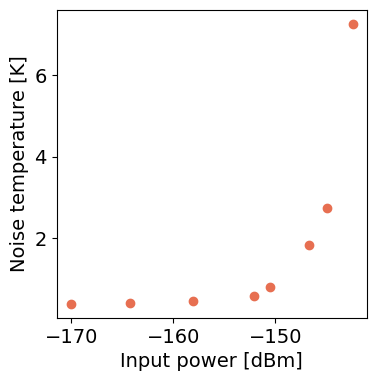

In [17]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))

ax.plot(P_cal_in, T_cal,'o', color = colors[5])
ax.set_xlabel('Input power [dBm]')
ax.set_ylabel('Noise temperature [K]')

plt.show()